In [16]:
import torch
import torchvision
import os
import torch.nn as nn
from ddpm.diffusion_model import DiffusionModel

import ddpm.config as _config

In [11]:
_config.DEBUG = False

In [12]:
cpt_path = 'epoch_24.pth'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
cpt = torch.load(cpt_path, map_location=device, weights_only=False)

model = nn.DataParallel(DiffusionModel(cpt['config'])).to(device)
model.load_state_dict(cpt['model'])

model.eval()

DiffusionModel(
  (model): ResNet(
    (pos_embedding): PositionalEmbedding()
    (time_mlp): TimestepMLP(
      (linear1): Linear(in_features=128, out_features=128, bias=True)
      (silu): SiLU()
      (linear2): Linear(in_features=128, out_features=128, bias=True)
    )
    (init_conv): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (up_layers): ModuleList(
      (0-1): 2 x ResBlock(
        (relu): ReLU()
        (norm1): GroupNorm(32, 2048, eps=1e-05, affine=True)
        (conv1): Conv2d(2048, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (norm2): GroupNorm(32, 1024, eps=1e-05, affine=True)
        (conv2): Sequential(
          (0): Dropout(p=0.1, inplace=False)
          (1): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (res): Conv2d(2048, 1024, kernel_size=(1, 1), stride=(1, 1))
        (attention): SelfAttention(
          (group_norm): GroupNorm(32, 1024, eps=1e-05, affine=True)
          (to

In [ ]:
image_num = 20

In [ ]:
labels = torch.ones(image_num, dtype=torch.long, device=device)

In [14]:
samples = model.sample(shape=(image_num, 3, 32, 32), device=device, y=labels)

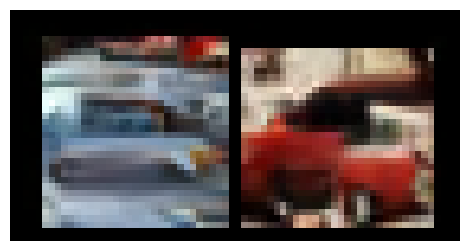

In [18]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

# Process all samples
processed_samples = [((sample + 1) / 2).clip(0, 1) for sample in samples]

# Create a grid with 5 images per row
grid = make_grid(processed_samples, nrow=5)

# Display the grid
plt.figure(figsize=(15, 3 * (len(processed_samples) // 5 + 1)))
plt.imshow(grid.permute(1, 2, 0).cpu())
plt.axis('off')
plt.show()